In [14]:
#Import necessary modules
%matplotlib inline
import data
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
print("Modules loaded!")


Modules loaded!


In [2]:
#Split CSV file into training and testing CSV files
if 1:
    '''Run line below to resave training and testing CSV files'''
    data.load_csv()

['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
[['data/udacityData/data/IMG/center_2016_12_01_13_43_37_055.jpg', 'data/udacityData/data/ IMG/left_2016_12_01_13_43_37_055.jpg', 'data/udacityData/data/ IMG/right_2016_12_01_13_43_37_055.jpg', ' 0', ' 0.9855326', ' 0', ' 30.18657'], ['data/udacityData/data/IMG/center_2016_12_01_13_32_46_185.jpg', 'data/udacityData/data/ IMG/left_2016_12_01_13_32_46_185.jpg', 'data/udacityData/data/ IMG/right_2016_12_01_13_32_46_185.jpg', ' -0.0787459', ' 0.9855326', ' 0', ' 29.91009'], ['data/udacityData/data/IMG/center_2016_12_01_13_35_22_183.jpg', 'data/udacityData/data/ IMG/left_2016_12_01_13_35_22_183.jpg', 'data/udacityData/data/ IMG/right_2016_12_01_13_35_22_183.jpg', ' -0.107229', ' 0.9855326', ' 0', ' 30.18682'], ['data/udacityData/data/IMG/center_2016_12_01_13_35_59_467.jpg', 'data/udacityData/data/ IMG/left_2016_12_01_13_35_59_467.jpg', 'data/udacityData/data/ IMG/right_2016_12_01_13_35_59_467.jpg', ' 0', ' 0.9855326', ' 0'

In [3]:
#Get training data
X_train, y_train = data.get_training_data()
print("Training data loaded")


Training CSV loaded
Training images loaded
Training data loaded


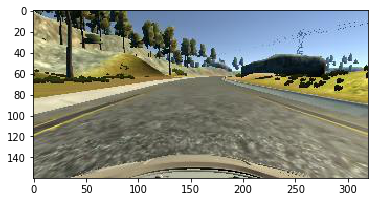

Image shape: (160, 320, 3)


In [32]:
#Examine images

#Display an image
plt.figure()
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.show()

#Print out image shape
print('Image shape:', X_train[0].shape)


In [34]:
#Preprocess data

#One-hot encode the labels
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)
print('Labels One-hot encoded')


X_train = np.array(X_train)
y_one_hot = np.array(y_one_hot)


Labels One-hot encoded


In [35]:
#Build model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(160, 320, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('softmax'))
print("Model Built")

#Compile model
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
print('Model Compiled')


Model Built
Model Compiled


In [39]:
#Train model
print('Training...')
history = model.fit(X_train, y_one_hot, nb_epoch = 10, validation_split = 0.2)
print('Model Trained!')

Training...


ValueError: Error when checking model target: expected activation_4 to have shape (None, 1) but got array with shape (6428, 122)